# The Sparks Foundation 
## K-means Clustering

### Author: Manthan Chougule ###

Task2 : Prediction Using Unsupervised ML (From the given ‘Iris’ dataset, predict the optimum number of clusters and representing it visually).     

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
iris_data = pd.read_csv("Iris.csv") 
print(iris_data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [3]:
# first 5 rows
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# last 5 rows
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.shape

(150, 6)

In [6]:
iris_data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [7]:
# for knowing more about data mean, std, max i.e. describtive statastic on data set
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
isNull = iris_data.isnull()
print(isNull)

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]


In [9]:
nullCount = isNull.count()
print(nullCount)

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64


 **Finding the optimal no of clusters for k-means classifiction**

In [10]:
# cluster classification
x = iris_data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

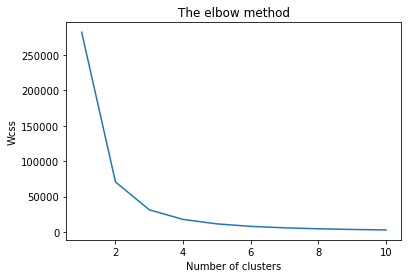

In [11]:
# plotting the results onto a line graph, allowing us to observe 'the elbow.'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
# wcss => within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

from this we choose the no of clusters as 3

### Pridiction

In [12]:
# applying Kmeans to datasts
# or creating kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

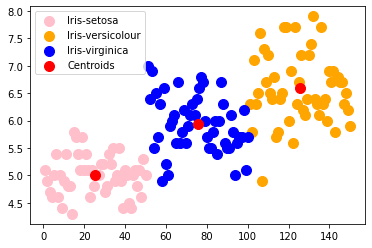

In [13]:
#Visualising the cluster - On the first two columns

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'Red', label = 'Centroids' )

plt.legend()

This shows the clusters present in the given dataset among species setosa, versicolour, virginica.

Text(0.5, 0.92, '3D graph kmeans cluster')

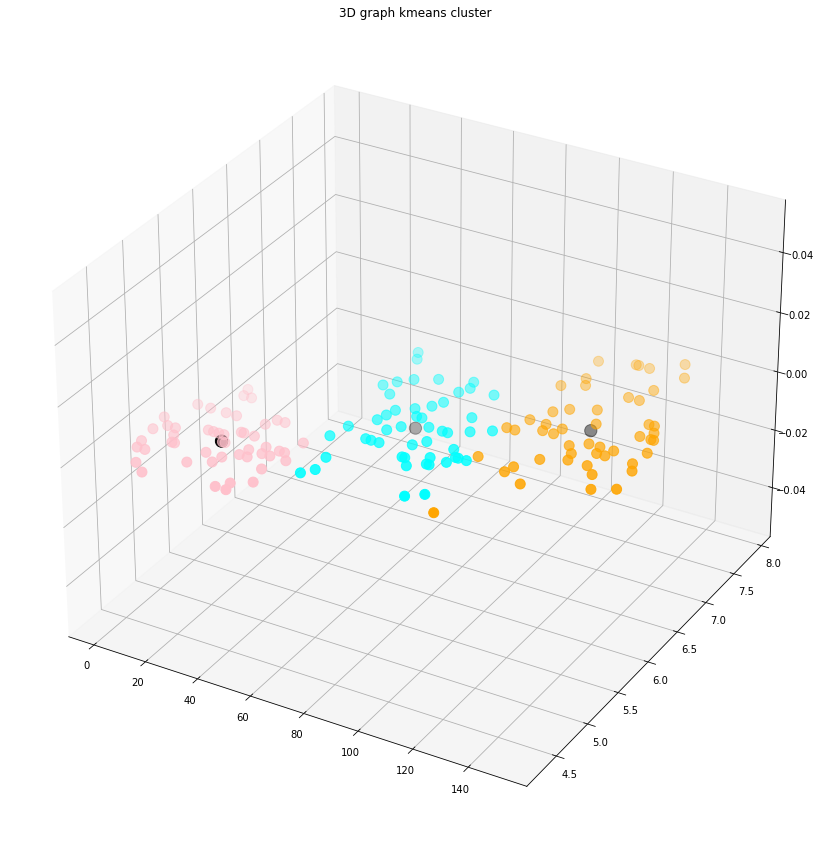

In [15]:
# 3d_scatterplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'cyan', label = 'Iris-virginica')


# plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 150, c = 'black', label = 'Centroids')
plt.title('3D graph kmeans cluster')